In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(pheatmap)


Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘pheatmap’ was built under R version 4.3.3”


In [2]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

In [3]:
df<-read.csv("03_DEGs_and_EnrichmentAnalysis/SLEA_3_Bcells.csv") %>% filter(celltype=='Core memory B cell')
df<-df %>% arrange(cohort.cohortGuid,Flu_Year,Flu_Day)

In [4]:
df_wide<-df[2:7] %>%
  pivot_wider(names_from = c(Flu_Day, cohort.cohortGuid	,Flu_Year), values_from = mean_pathway_score) %>% as.data.frame()

In [5]:
rownames(df_wide)<-gsub("HALLMARK_","",df_wide$pathway)

In [6]:
df_wide<-df_wide[3:10]

In [7]:
column_labels <- c("Year 1 Day 0", "Year 1 Day 7", "Year 2 Day 0", "Year 2 Day 7", 
                   "Year 1 Day 0", "Year 1 Day 7", "Year 2 Day 0", "Year 2 Day 7")

In [8]:
# Create the annotation dataframe with only the cohort.cohortGuid
annotation_df <-as.data.frame(colnames(df_wide))
rownames(annotation_df)<-colnames(df_wide)
annotation_df$cohort.cohortGuid <-substr(colnames(df_wide),7,9)

In [9]:
annotation_df <- annotation_df %>%
  mutate(`Age Group` = ifelse(cohort.cohortGuid	 == "BR1", "Young", "Older"))%>% select(`Age Group`)
# Set custom colors for the cohorts
annotation_colors <- list(`Age Group` = c(Young = "#35978F", Older = "#BF812D"))

In [10]:
#breaks_sequence <- seq(-1, 1, length.out = 100)

pdf 
  2

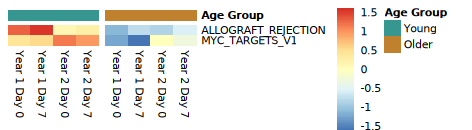

In [11]:
options(repr.plot.width = 100/25.4, repr.plot.height = 27.5/25.4)
heatmap_plot <- pheatmap(df_wide, 
         scale = "row", 
         cluster_cols = FALSE, 
         border_color=NA,
         cluster_rows = FALSE, 
         fontsize = 6,
         gaps_col = c(4),
         clustering_method = "ward.D", 
          annotation_col = annotation_df, 
         annotation_colors = annotation_colors, 
         labels_col = column_labels)
save_pheatmap(heatmap_plot,'FigureD.pdf', 
              width=100/25.4, height=27.5/25.4)

In [12]:
colnames(df_wide)<-gsub("BR1","Young",colnames(df_wide))
colnames(df_wide)<-gsub("BR2","Older",colnames(df_wide))

write.csv(df_wide,
          "/home//workspace/Source_Data/Extended_Fig6d.csv")